### Logistic Regression Tutorial for Machine Learning
https://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/

In [1]:
data = [[2.7810836,2.550537003,0],[1.465489372,2.362125076,0], [3.396561688,4.400293529,0],[1.38807019,1.850220317,0],
[3.06407232,3.005305973,0],[7.627531214,2.759262235,1], [5.332441248,2.088626775,1],[6.922596716,1.77106367,1],
[8.675418651,-0.2420686549,1],[7.673756466,3.508563011,1]]

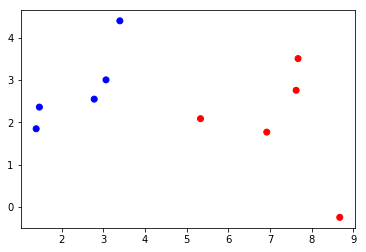

In [7]:
import matplotlib.pyplot as plt
import numpy as np
x_1 = [row[0] for row in data]
x_2 = [row[1] for row in data]
y = [row[-1] for row in data]
color= ['red' if value == 1 else 'blue' for value in y]
fig = plt.scatter(x_1, x_2, c=color)
print(fig)

In [3]:
b_0 = 0.0
b_1 = 0.0
b_2 = 0.0
learning_rate = 0.3
epoch = 10

The prediction (probability $p$): $h(t)=\frac{1}{1+e^{-t}}$ where 
$t=b_{0}+b_{1}x_{1}+b_{2}x_{2}$. 

The cost function is defined as: $f=\frac{1}{2}\sum(y-h(t))^{2}=\frac{1}{2}\sum(y-h(x_{1},x_{2}))^{2}$

$h'(t)=h(t)(1-h(t))$,then $\frac{\partial f}{\partial\theta_{i}}=-(y-h(x_{1},x_{2}))h'(x_{1},x_{2})x_{i}=-(y-h(t))h(t)(1-h(t))x_{i}$

Initially, $b_0$, $b_1$ and $b_2$ are set as 0. In each iteration, they are updated as: $b_i = b_i + learning\_rate * (y - p) * p * (1-p) * x_i$

Learning rate set as 0.3 and number of epoch set as 10.



Text(0.5,1,'accuracy percentage in each epoch')

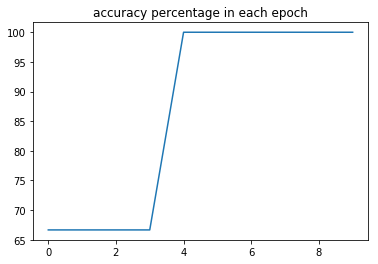

In [4]:
b = [b_0, b_1, b_2]
b_list = []
accuracy_list = []

from math import exp
import pandas as pd


def predict(b, row):
    prediction = 1/(1+exp(-(b[0]+b[1]*row[0]+b[2]*row[1])))
    return prediction

def calc_accuracy(b, row):
    sum_error = 0.0
    for row in data:
        y_test = predict(b_list[-1], row)
        y_label = (1 if y_test>=0.5 else 0)
        y_train = row[-1]
        error = abs(y_label - y_train)
        sum_error += error
        accuracy = (1-sum_error/len(data[-1]))*100
        return accuracy
    
for i in range(epoch):
    for row in data:
        prediction = predict(b, row)
        b[0] = b[0] + learning_rate * (row[-1] - prediction) * prediction * (1-prediction)
        b[1] = b[1] + learning_rate * (row[-1] - prediction) * prediction * (1-prediction) * row[0]
        b[2] = b[2] + learning_rate * (row[-1] - prediction) * prediction * (1-prediction) * row[1]
        b_list.append([b[0], b[1],b[2]])
    accuracy = calc_accuracy(b_list[-1], data)
    accuracy_list.append(accuracy)
    
plt.plot(accuracy_list)
plt.title('accuracy percentage in each epoch')


If predict value < 0.5, then it is labeled as 0, else 1.

In [5]:
y_test = []
y_label = []
y_train = []
for row in data:
    y_test_val = predict(b_list[-1], row)
    y_test.append(y_test_val)
    y_label.append(1 if y_test_val>=0.5 else 0)
    y_train.append(row[-1])
    
results = pd.DataFrame(list(zip(y_test, y_label, y_train)), columns = ('predict value', 'test label', 'actual label'))
print(results)

   predict value  test label  actual label
0       0.298757           0             0
1       0.145951           0             0
2       0.085333           0             0
3       0.219737           0             0
4       0.247059           0             0
5       0.954702           1             1
6       0.862034           1             1
7       0.971773           1             1
8       0.999295           1             1
9       0.905489           1             1


Using the results obtained from the final epoch, $b_0$ = -0.406605, $b_1$ = 0.852573, $b_2$ = -1.104746. It can be seen that the line below can separate the two classes.

Values of coefficients:  [-0.4066054639903162, 0.8525733163581151, -1.1047462590413433]


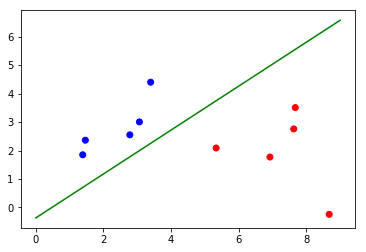

In [6]:
print('Values of coefficients: ', b_list[-1])
line_value = [b_list[-1][0]+b_list[-1][1]*row[0]+b_list[-1][-1]*row[1] for row in data]
x = np.linspace(0,9,100)
temp = (-b_list[-1][0]-b_list[-1][1]*x)*(1/b_list[-1][-1])
plt.scatter(x_1, x_2, c=color)
plt.plot(x,temp, 'green')